In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_customers = pd.read_csv('dataset/Customers.csv')
df_products = pd.read_csv('dataset/Products.csv')
df_transactions = pd.read_csv('dataset/Transactions.csv')

In [3]:
df_customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [4]:
df_products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [5]:
df_transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 8:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 2:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [6]:
# products that haven't been sold even once
unsold_products = df_products[~df_products["ProductID"].isin(df_transactions["ProductID"])]

# customers who haven't made a single transaction
inactive_customers = df_customers[~df_customers["CustomerID"].isin(df_transactions["CustomerID"])]

print("Products that haven't been sold:")
print(unsold_products)

print("\nCustomers who haven't made a single transaction:")
print(inactive_customers)

Products that haven't been sold:
Empty DataFrame
Columns: [ProductID, ProductName, Category, Price]
Index: []

Customers who haven't made a single transaction:
    CustomerID   CustomerName Region  SignupDate
179      C0180  Amy Carpenter   Asia  2023-10-25


In [7]:
df_merge1 = pd.merge(df_transactions, df_products, on='ProductID', how='left')

In [8]:
# Creating a full dataset
dataset = pd.merge(df_merge1, df_customers, on='CustomerID', how='left')

In [9]:
dataset

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 8:30:27,1,459.86,459.86,SoundWave Smartwatch,Electronics,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 2:15:24,3,1379.58,459.86,SoundWave Smartwatch,Electronics,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,SoundWave Smartwatch,Electronics,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,SoundWave Smartwatch,Electronics,459.86,Joshua Hamilton,Asia,2024-11-11


In [10]:
# Checking missing values
dataset.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
ProductName        0
Category           0
Price_y            0
CustomerName       0
Region             0
SignupDate         0
dtype: int64

In [11]:
# Since both 'Price_x' and 'Price_y' are the same, rename one to 'Price' and drop another
dataset.rename(columns={'Price_x':'Price'}, inplace=True)
dataset.drop('Price_y', axis=1, inplace=True)

In [12]:
dataset.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
 7   ProductName      1000 non-null   object 
 8   Category         1000 non-null   object 
 9   CustomerName     1000 non-null   object 
 10  Region           1000 non-null   object 
 11  SignupDate       1000 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [14]:
# convert dates to datetime
dataset['TransactionDate'] = pd.to_datetime(dataset['TransactionDate'])
dataset['SignupDate'] = pd.to_datetime(dataset['SignupDate'])

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
 7   ProductName      1000 non-null   object        
 8   Category         1000 non-null   object        
 9   CustomerName     1000 non-null   object        
 10  Region           1000 non-null   object        
 11  SignupDate       1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 93.9+ KB


In [16]:
dataset.duplicated(subset=['TransactionID']).sum()

np.int64(0)

In [17]:
# Check for duplicates in TransactionID, CustomerID, ProductID to ensure data integrity.
dataset.duplicated(subset=['TransactionID', 'CustomerID', 'ProductID']).sum()

np.int64(0)

In [18]:
# Check if TotalValue equals Quantity * Price (upto 2 decimal places)
if (dataset['TotalValue'] == round(dataset['Quantity'] * dataset['Price'], 2)).all():
    print('TotalValue is equal to Quantity * Price')

TotalValue is equal to Quantity * Price


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
 7   ProductName      1000 non-null   object        
 8   Category         1000 non-null   object        
 9   CustomerName     1000 non-null   object        
 10  Region           1000 non-null   object        
 11  SignupDate       1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 93.9+ KB


In [20]:
# save the dataset
dataset.to_csv('dataset/dataset_merged.csv', index=False)

In [21]:
# Analyze sales by Region: total revenue, average transaction value per region.
region_revenue = dataset.groupby('Region')['TotalValue'].agg(['sum']).sort_values(by='sum', ascending = False)
region_revenue

,sum
Region,
South America,219352.56
Europe,166254.63
North America,152313.40
Asia,152074.97


<Axes: title={'center': 'Region wise revenue'}, xlabel='Region', ylabel='Revenue'>

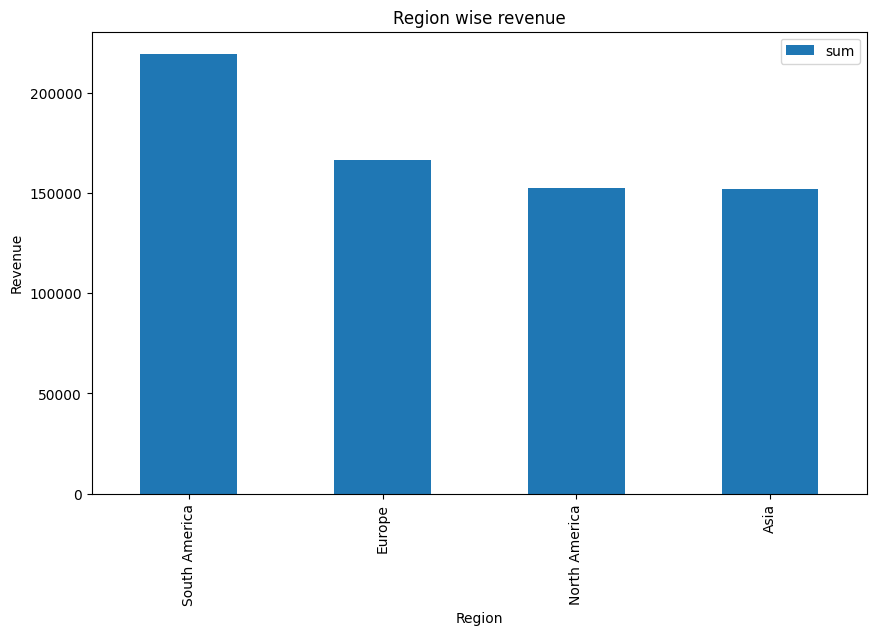

In [22]:
# plot of region wise revenue
region_revenue.plot(kind='bar', figsize=(10, 6), title='Region wise revenue', ylabel='Revenue')

In [23]:
# Analyze sales by Category: which categories contribute most to revenue.
category_revenue = dataset.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64

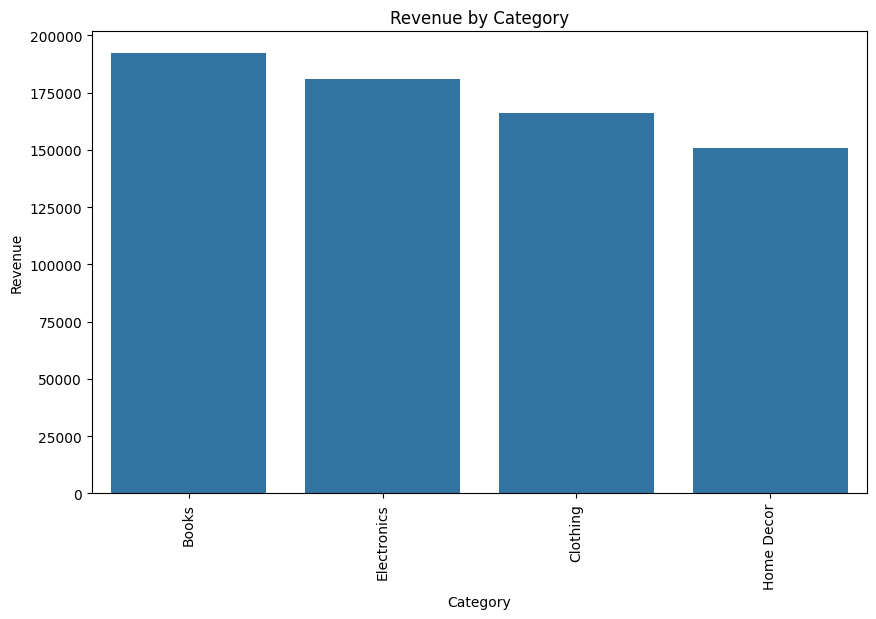

In [24]:
# plot the revenue by category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.title('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

In [25]:
# region wise top categories
region_category_revenue = dataset.groupby(['Region', 'Category'])['TotalValue'].sum().unstack().T
region_category_revenue

Region,Asia,Europe,North America,South America
Category,,,,
Books,33119.03,47464.42,41811.99,69752.03
Clothing,49353.09,36335.59,38038.49,42443.49
Electronics,35658.15,41562.60,44716.43,58846.32
Home Decor,33944.70,40892.02,27746.49,48310.72


<Axes: title={'center': 'Region wise revenue by Category'}, xlabel='Category', ylabel='Revenue'>

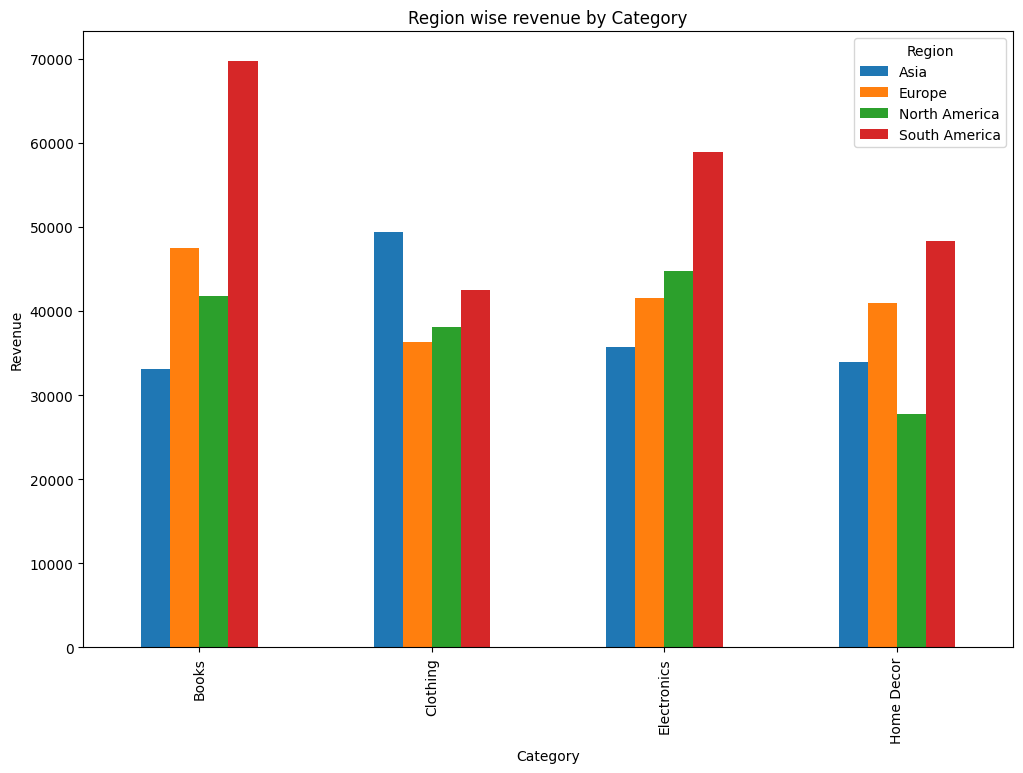

In [26]:
# plot the revenue by region and category
region_category_revenue.plot(kind='bar', figsize=(12, 8), title='Region wise revenue by Category', ylabel='Revenue')

In [27]:
# Top 10 custumers for revenue with name and revenue
top_10_customers = dataset.groupby('CustomerID').agg({'CustomerName':'first', 'TotalValue':'sum'}).sort_values('TotalValue', ascending=False).head(10)

In [28]:
top_10_customers

,CustomerName,TotalValue
CustomerID,,
C0141,Paul Parsons,10673.87
C0054,Bruce Rhodes,8040.39
C0065,Gerald Hines,7663.70
C0156,William Adams,7634.45
C0082,Aimee Taylor,7572.91
C0188,Anna Ball,7111.32
C0059,Mrs. Kimberly Wright,7073.28
C0028,Jennifer Pena,6819.57
C0099,Rodney Eaton,6715.72


In [29]:
# Top 5 customers region wise
top_5_customers = dataset.groupby(['Region', 'CustomerID']).agg({'CustomerName':'first', 'TotalValue':'sum'}).sort_values('TotalValue', ascending=False).groupby('Region').head(5)
top_5_customers = top_5_customers.reset_index().set_index('Region')

In [30]:
# display the top 5 customers grouped region wise together
grouped_top_5 = top_5_customers.groupby('Region')
for region, group in grouped_top_5:
    display(group[['CustomerName', 'TotalValue']])

,CustomerName,TotalValue
Region,,
Asia,Bruce Rhodes,8040.39
Asia,Jennifer Pena,6819.57
Asia,Matthew Johnson,6210.53
Asia,Brian Parker,6044.63
Asia,Michael Williams,6021.80


,CustomerName,TotalValue
Region,,
Europe,Paul Parsons,10673.87
Europe,Lindsey Deleon,6149.78
Europe,Misty Higgins,5848.97
Europe,Benjamin Anderson,5780.43
Europe,Nicholas Ellis,5699.57


,CustomerName,TotalValue
Region,,
North America,Gerald Hines,7663.70
North America,William Adams,7634.45
North America,Mrs. Kimberly Wright,7073.28
North America,Mark Cox,5950.42
North America,Beth Cardenas,5627.83


,CustomerName,TotalValue
Region,,
South America,Aimee Taylor,7572.91
South America,Anna Ball,7111.32
South America,Rodney Eaton,6715.72
South America,Juan Mcdaniel,6708.10
South America,Travis Campbell,6604.23


In [31]:
# Time-based analysis: monthly sales trends
dataset['TransactionMonth'] = dataset['TransactionDate'].dt.to_period('M')
monthly_revenue = dataset.groupby('TransactionMonth')['TotalValue'].sum()
monthly_revenue

TransactionMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64

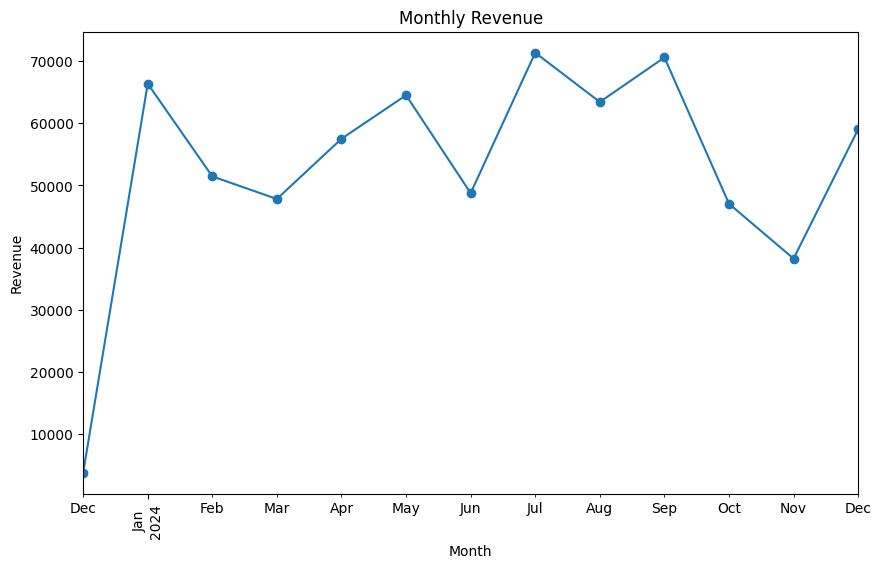

In [32]:
# plot the monthly revenue
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

In [33]:
# Correlation analysis: check if there is any correlation between Quantity, Price, and TotalValue.
correlation = dataset[['Quantity', 'Price', 'TotalValue']].corr()
correlation

,Quantity,Price,TotalValue
Quantity,1.000000,-0.009378,0.609972
Price,-0.009378,1.000000,0.722714
TotalValue,0.609972,0.722714,1.000000


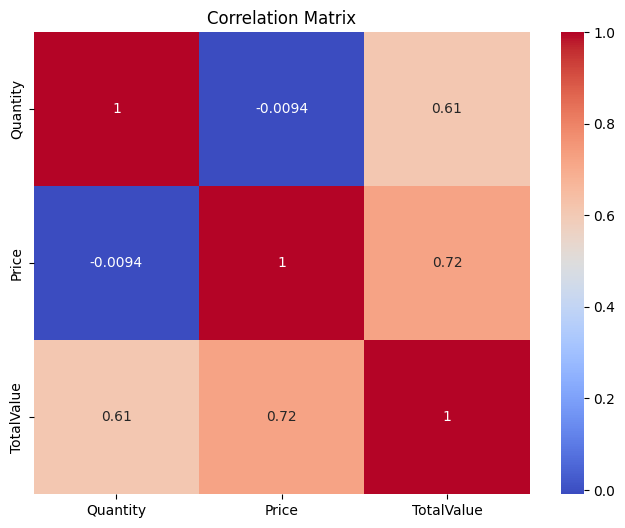

In [34]:
# plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()